# Subpixel Intensity Shift Calculation

In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

from tiepy.speckle.template_utils import get_windows
from tiepy.speckle.objects import generate_speckle_pattern, generate_gaussian_2d
from tiepy.speckle.subpixel import calculate_normalized_correlation, process_subset_images

3it [00:00,  4.15it/s]


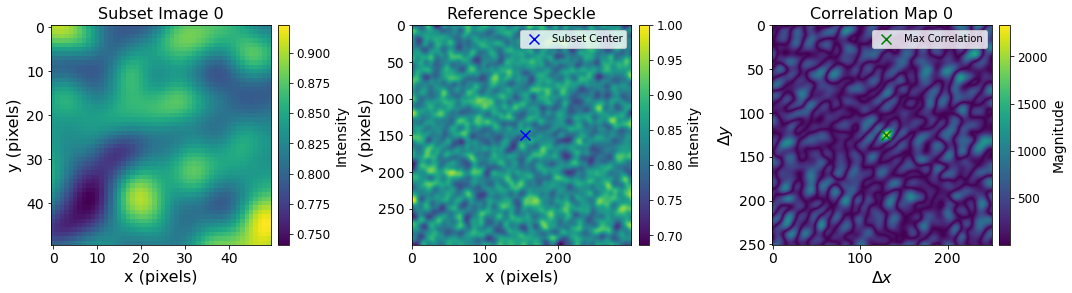

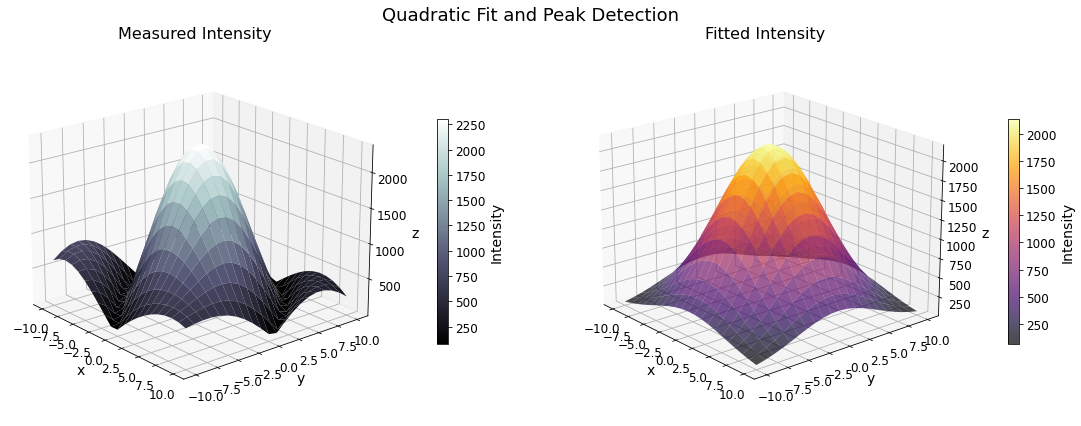

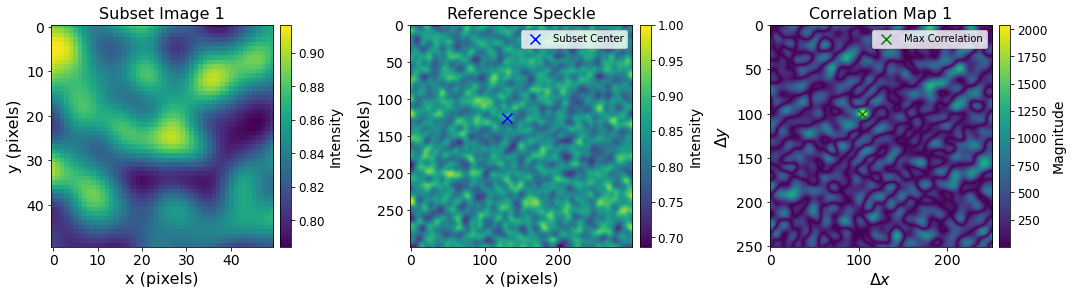

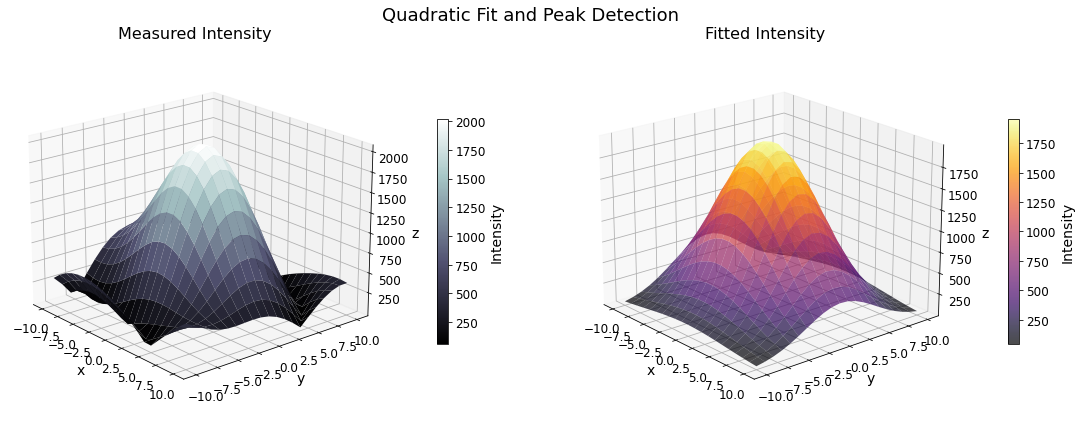

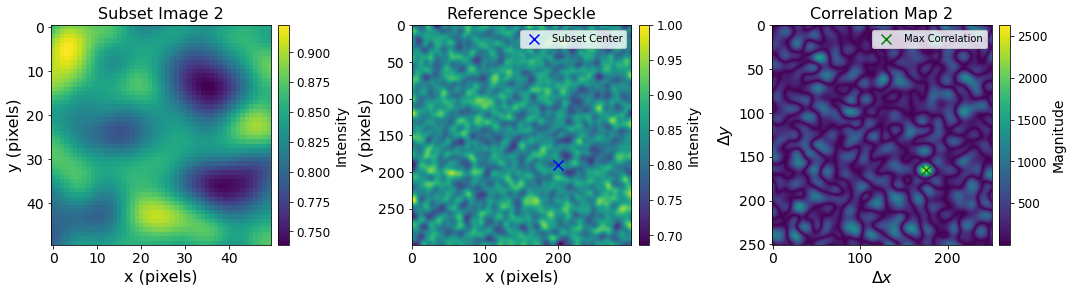

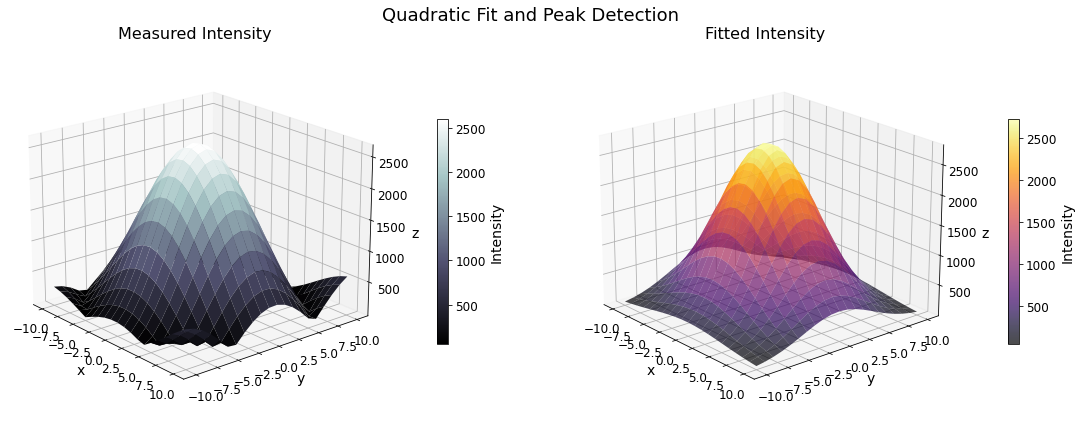


Subset Image 1:
  Subpixel Peak Shift: (0.20697058876713367, -0.1748847130830311)
  Subpixel Peak Position: (150.20697058876712, 154.82511528691697)

  Max Correlation Shift: (0, 0)
  Max Correlation Position: (150, 150)

  Subset Center: (150, 155)

Subset Image 2:
  Subpixel Peak Shift: (-0.47383346316991504, -0.7709762102677572)
  Subpixel Peak Position: (124.52616653683009, 129.22902378973225)

  Max Correlation Shift: (0, -1)
  Max Correlation Position: (150, 149)

  Subset Center: (125, 130)

Subset Image 3:
  Subpixel Peak Shift: (-0.21455254652476224, -0.07444886455883395)
  Subpixel Peak Position: (189.78544745347523, 199.92555113544117)

  Max Correlation Shift: (0, 0)
  Max Correlation Position: (150, 150)

  Subset Center: (190, 200)


In [2]:
# Example usage:

# Generate speckle pattern for the larger Gaussian (reference_image)
reference_image = generate_speckle_pattern(shape = (300,300),
                                           intensity_range = [0,1],
                                          speckle_size = 4)

reference_image /= np.max(reference_image)

dx, dy = reference_image.shape

# Define a window width
w = 25


# For this example, we chose a subset of images from the reference set
subset_centers = [(150,155), (125, 130), (190,200)]



subset_images = [reference_image[c[0]-w:c[0]+w, c[1]-w:c[1]+w] for c in subset_centers]


results = process_subset_images(reference_image,
                                subset_images, subset_centers,
                                plot=True)




# Print the processed results
for i in range(len(results['shifts'])):

    subpix_shift= results['subpixel_shifts'][i]
    shift = results['shifts'][i]
    subset_center = results['subset_centers'][i]

    max_corr_position = (shift[0]+dx//2,
                        shift[1]+dy//2)

    max_subpix_position = (subpix_shift[0]+subset_center[0],
                    subpix_shift[1]+subset_center[1])
    
    print("")
    print(f"Subset Image {i+1}:")

    print("  Subpixel Peak Shift:", subpix_shift)
    print("  Subpixel Peak Position:", max_subpix_position)
    print("")
    print("  Max Correlation Shift:", shift)
    print("  Max Correlation Position:", max_corr_position)
    print("")
    print("  Subset Center:", subset_center)



